In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=287455ea6e2ca31b9a13fa02c8658e2a8678a5a05adc74e77c51077328bea104
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os
import warnings
warnings.simplefilter("ignore")

In [22]:
X = load_boston().data
Y = load_boston().target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [17]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=3, max_features="auto", max_samples=None, random_state=0)
dtr = DecisionTreeRegressor()
lr = LinearRegression()
rfr.fit(X_train, Y_train)
dtr.fit(X_train, Y_train)
lr.fit(X_train, Y_train)

LinearRegression()

In [18]:
print(f"Random Forest Regressor train accuracy: {rfr.score(X_train, Y_train)}")
print(f"Random Forest Regressor test accuracy: {rfr.score(X_test, Y_test)}")
print(f"Decision Tree Regressor train accuracy: {dtr.score(X_train, Y_train)}")
print(f"Decision Tree Regressor test accuracy: {dtr.score(X_test, Y_test)}")
print(f"Linear Regressor train accuracy: {lr.score(X_train, Y_train)}")
print(f"Linear Regressor test accuracy: {lr.score(X_test, Y_test)}")

Random Forest Regressor train accuracy: 0.8869939123082015
Random Forest Regressor test accuracy: 0.7508617134870595
Decision Tree Regressor train accuracy: 1.0
Decision Tree Regressor test accuracy: 0.6655266702325136
Linear Regressor train accuracy: 0.7697699488741149
Linear Regressor test accuracy: 0.635463843320211


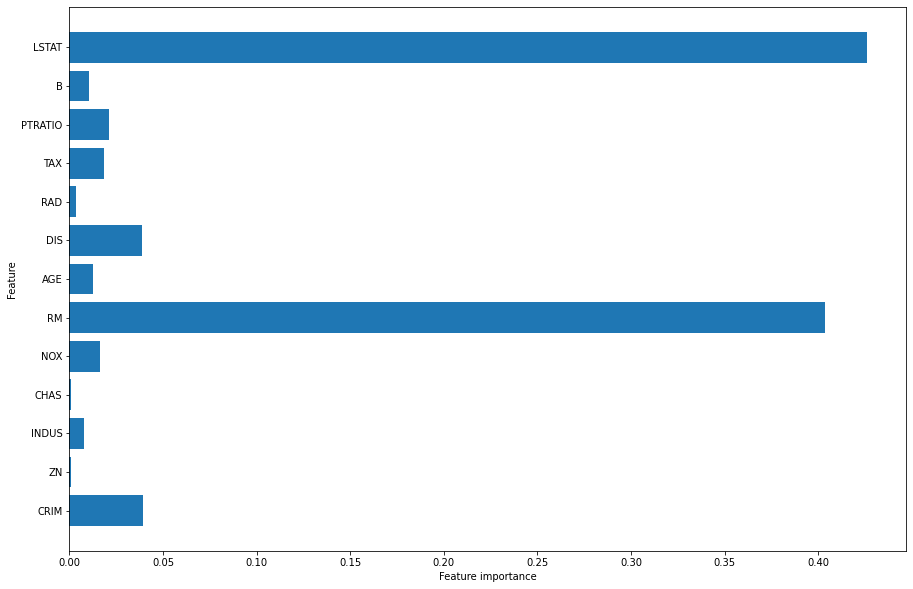

In [ ]:
def plot_feature_importances_boston(model):
  n_features = load_boston().data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), load_boston().feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_boston(rfr)

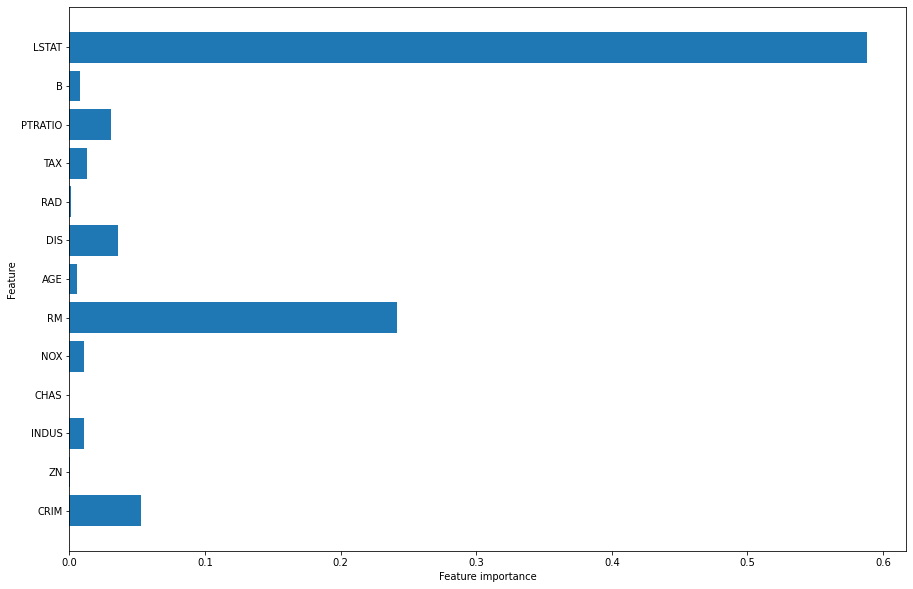

In [ ]:
def plot_feature_importances_boston(model):
  n_features = load_boston().data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), load_boston().feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_boston(dtr)

train accuracy: 0.9983378958561712
test accuracy: -4.57728749495636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


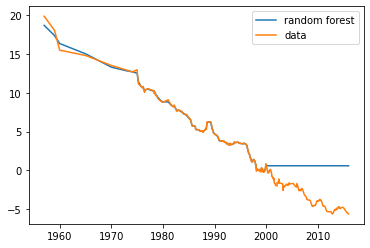

In [ ]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
train = ram_prices[ram_prices.date < 2000]
test = ram_prices[ram_prices.date >= 2000]
X = ram_prices.date[:, np.newaxis]
X_train = train.date[:, np.newaxis]
Y_train = np.log(train.price)
X_test = test.date[:, np.newaxis]
Y_test = np.log(test.price)
rdr = RandomForestRegressor()
rdr.fit(X_train, Y_train)
print(f"train accuracy: {rdr.score(X_train, Y_train)}")
print(f"test accuracy: {rdr.score(X_test, Y_test)}")
plt.plot(ram_prices.date, rdr.predict(X), label="random forest")
plt.plot(ram_prices.date, np.log(ram_prices.price), label="data")
plt.legend()